In [11]:
import sys
sys.path.append('/home/jovyan/work/d2l/notebooks/d2l_utils')
import d2l
import torch
import warnings
warnings.filterwarnings("ignore")


class HighDimData(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        super().__init__()
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        self.w, self.b = torch.ones(num_inputs, 1) * 0.01, 0.05
        self.y = torch.matmul(self.X, self.w) + self.b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)


class WeightDecayScratch(d2l.LinearRegressScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return super().loss(y_hat, y) + self.lambd * d2l.l2_penalty(self.w)


def train_strach(lambd, trainer, data):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    trainer.fit(model, data)
    print(f'l2 norm of w:{d2l.l2_penalty(model.w):.2g}')

l2 norm of w:0.01


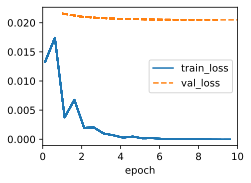

In [12]:
data = HighDimData(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)
train_strach(0, trainer, data)

# 3.7.6. Exercises

## 1. When can you solve the problem of polynomial regression exactly?

Polynomial regression is a form of regression analysis in which the relationship between the independent variable (input) and the dependent variable (output) is modeled as an nth-degree polynomial. In some cases, polynomial regression can be solved exactly, meaning that you can find the coefficients of the polynomial that perfectly fits the data points without any error. This happens under certain conditions:

1. **Linear Case:** When the degree of the polynomial is 1 (i.e., a linear regression), the problem is inherently solvable exactly using techniques like the least squares method. This is because the relationship is linear, and the parameters (coefficients) can be directly computed using closed-form solutions.

2. **Data Points Matching:** In some cases, when the data points exactly match the polynomial degree (n + 1 data points for an nth-degree polynomial), it's possible to find a unique polynomial that passes through all the data points exactly. This is essentially an interpolation problem.

3. **Noise-Free Data:** If the data points are noise-free and there are no outliers, the polynomial coefficients can be determined exactly to fit the data perfectly. However, real-world data often contains noise, which can lead to overfitting if a high-degree polynomial is used.

It's important to note that while it's mathematically possible to solve polynomial regression exactly under these conditions, it might not always be practical or meaningful. In real-world scenarios, data is often noisy and prone to outliers, and using higher-degree polynomials to fit the data exactly can lead to overfitting and poor generalization to new data points.

When dealing with real-world data, it's common to use techniques like regularization and cross-validation to choose appropriate polynomial degrees and prevent overfitting. In most cases, the goal is to find a polynomial model that captures the underlying patterns in the data while avoiding overfitting to noise and outliers.

## 2. Give at least five examples where dependent random variables make treating the problem as IID data inadvisable.

Dependent random variables violate the assumption of independence that underlies the concept of IID (independent and identically distributed) data. Treating dependent data as IID can lead to incorrect conclusions and flawed analyses. Here are five examples where considering dependent variables as IID is inadvisable:

1. **Time Series Data**: In time series analysis, data points are collected over time and are often correlated. Ignoring the temporal dependence by assuming IID can lead to inaccurate results. For example, in financial analysis, stock prices from one day to the next are unlikely to be independent.

2. **Spatial Data**: When dealing with spatial data, observations at nearby locations tend to be correlated. Treating them as IID can ignore the spatial structure and lead to inappropriate statistical inferences. This is common in geostatistics and environmental studies.

3. **Panel Data**: Panel data involves repeated observations on the same entities over time. Ignoring the dependence between observations within the same entity can result in incorrect parameter estimates and standard errors, rendering the analysis unreliable.

4. **Longitudinal Studies**: In longitudinal studies, individuals are measured or observed at multiple time points. Assuming IID would disregard the within-subject correlation, potentially leading to biased conclusions, especially when analyzing the effect of interventions or treatments over time.

5. **Autocorrelated Data**: When the observations in a dataset are correlated with their own past values, such as in autoregressive processes, assuming IID can distort the estimated variances and covariances, leading to incorrect hypothesis testing and confidence interval calculations.

In all these cases, the assumption of independence is violated, making the use of methods designed for IID data inappropriate. It's crucial to account for the dependencies and employ appropriate statistical techniques that consider the nature of the dependence structure present in the data.

## 3. Can you ever expect to see zero training error? Under which circumstances would you see zero generalization error?

When the model is highly complex and has enough capacity to fit the training data perfectly. This often indicates overfitting, where the model has captured noise in the data.
When the training data contains repeated instances, essentially allowing the model to memorize the data.

## 4. Why is $K$-fold cross-validation very expensive to compute?

$k$-fold cross-validation involves partitioning the dataset into $k$ subsets (or folds), training the model on $k-1$ folds, and then evaluating its performance on the remaining fold. This process is repeated $k$ times, with each fold serving as the test set once. While $k$-fold cross-validation is a valuable technique for estimating a model's performance and tuning hyperparameters, it can be computationally expensive for a few reasons:

1. **Multiple Model Trainings**: In each iteration of $k$-fold cross-validation, the model needs to be trained $k-1$ times. If the model is complex or requires a lot of computational resources, this can add up quickly. For large datasets or complex models (e.g., deep neural networks), the training process can be time-consuming.

2. **Data Reprocessing**: For each iteration, the training data needs to be preprocessed and transformed, which can involve steps such as feature scaling, encoding categorical variables, and more. This preprocessing step needs to be repeated $k$ times, adding to the computational cost.

3. **Hyperparameter Tuning**: If you're using $k$-fold cross-validation for hyperparameter tuning, each set of hyperparameters must be evaluated $k$ times. This can greatly increase the computational load, especially if you're searching through a large hyperparameter space.

4. **Ensemble Models**: If you're using $k$-fold cross-validation to train multiple models for an ensemble (e.g., bagging, boosting), the computational cost is multiplied by the number of models in the ensemble.

5. **I/O Overhead**: Repeatedly reading and loading data from storage can introduce overhead, especially if the dataset is large. This can impact the overall computation time.

6. **Resource Constraints**: Some systems might have limited resources, such as memory and processing power, making it challenging to perform $k$-fold cross-validation efficiently.

To mitigate the computational expense of $k$-fold cross-validation, researchers and practitioners often resort to techniques like parallel processing (if applicable), using a smaller $k$ value (e.g., 5-fold or 3-fold instead of 10-fold), and using techniques like stratified sampling to ensure that each fold maintains the distribution of the target variable.

While $k$-fold cross-validation can be computationally expensive, its benefits in estimating model performance and hyperparameter tuning often outweigh the costs. However, researchers and practitioners should carefully consider the trade-offs and select an appropriate validation strategy based on their computational resources and the nature of the problem at hand.

## 5. Why is the $K$-fold cross-validation error estimate biased?

$k$-fold cross-validation is a popular technique for estimating a model's performance on unseen data and for tuning hyperparameters. However, the estimated error obtained from $k$-fold cross-validation can have a bias, primarily due to the way data is partitioned and models are trained in each fold. This bias arises from the fact that the same data points are used for both training and validation across different folds. This can lead to overestimation or underestimation of the true error. Here's why:

1. **Data Overlap**: In each fold of $k$-fold cross-validation, the training and validation sets overlap. This means that the model might see similar or even identical data points during both training and validation. If the model can memorize the training data, it might perform very well on the validation set even if it doesn't generalize well to new, unseen data.

2. **Model Selection Bias**: When you perform hyperparameter tuning using $k$-fold cross-validation, you're effectively selecting the hyperparameters that work best for the specific data splits in the cross-validation. These optimal hyperparameters might not generalize well to new data, leading to overly optimistic error estimates.

3. **Data Split Variability**: The choice of how to partition the data into $k$ folds can impact the estimated error. If the data has some inherent structure, and one fold happens to capture a particularly easy or difficult subset of the data, the estimated error might not accurately represent the model's true performance on unseen data.

4. **Small Dataset Bias**: In cases where the dataset is small, the overlap between training and validation sets can be more significant. This makes it easier for the model to learn specific noise patterns present in the data.

5. **Unrepresentative Folds**: In some cases, the partitioning of the data might lead to unrepresentative folds. For example, if you're dealing with imbalanced classes, a fold might have an unusually large or small number of instances from a specific class, leading to biased error estimates.

While $k$-fold cross-validation provides a more robust estimate of model performance compared to a single train-test split, it's important to be aware of its potential bias. To mitigate this bias, techniques like stratified sampling, repeated cross-validation, and leave-one-out cross-validation can be used. Additionally, it's essential to consider the estimated error as a range or distribution rather than a single value and to carefully interpret the results in the context of the problem you're addressing.

## 6. The VC dimension is defined as the maximum number of points that can be classified with arbitrary labels $\left\{\pm1\right\}  $ by a function of a class of functions. Why might this not be a good idea for measuring how complex the class of functions is? Hint: consider the magnitude of the functions.

The Vapnik-Chervonenkis (VC) dimension is a concept from statistical learning theory that provides a measure of the capacity or complexity of a class of functions. While it's a valuable concept, there are limitations to using the VC dimension as the sole measure of complexity. One of these limitations relates to the magnitude of the functions within the class. Here's why:

The VC dimension focuses on the capability of a class of functions to shatter any set of points. If a class can shatter a set of $k$ points, it's said to have a VC dimension of at least $k$. However, this notion doesn't directly take into account the behavior of the functions beyond their ability to classify the points. It doesn't consider the "magnitude" or "size" of the functions in the class.

Consider the following scenarios:

1. **Magnitude of Functions**: The VC dimension doesn't consider the complexity that arises from the amplitude or range of the function values. A class of functions might be able to fit any set of points, but if the functions within that class have extremely high or low values, this can lead to overfitting or impractical models. Thus, the VC dimension alone might not capture the complexity introduced by the diversity of function magnitudes.

2. **Function Smoothness**: The VC dimension doesn't differentiate between smooth and non-smooth functions. A class of step functions with a high VC dimension can be more complex in terms of shattering points, but they might not generalize well due to their inherent discontinuities.

3. **Sensitivity to Noise**: A class of functions with high VC dimension might be able to perfectly fit random noise in the training data, leading to overfitting. However, these functions might not generalize well to new data.

In essence, the VC dimension emphasizes the combinatorial complexity of a class of functions, but it doesn't account for other aspects of complexity that are important for practical applications, such as function magnitude, smoothness, and generalization ability. Therefore, while the VC dimension is a useful theoretical concept for understanding capacity, it should be considered alongside other measures and factors when assessing the complexity and practicality of a class of functions.

## 7. Your manager gives you a difficult dataset on which your current algorithm does not perform so well. How would you justify to him that you need more data? Hint: you cannot increase the data but you can decrease it.

When faced with a difficult dataset and the need for better performance, you can approach your manager to justify the need for more data by highlighting the challenges posed by the current dataset and the potential benefits of having a larger dataset. Here's how you could explain it:

"Thank you for providing me with the challenging dataset to work on. After thorough analysis and experimentation, I've identified some limitations with our current algorithm's performance. While the current dataset is certainly valuable, there are certain aspects that are hindering our algorithm's ability to generalize effectively. Specifically, I've observed the following issues:

1. **Limited Representativeness**: The current dataset might not fully capture the diversity and complexity of the real-world scenarios that our algorithm needs to handle. This can lead to overfitting or underfitting, as the algorithm struggles to generalize from a relatively small set of examples.

2. **Data Imbalance**: Imbalanced class distributions or lack of sufficient samples for certain classes can lead to biased predictions and suboptimal performance. A larger dataset could help us address these imbalances and improve model accuracy.

3. **Noise and Outliers**: In small datasets, noise and outliers can have a disproportionately large impact on model training and evaluation. More data can help mitigate the influence of these outliers and provide a more stable learning environment.

4. **Model Complexity**: The complexity of the problem we're tackling might require a more sophisticated model. With a larger dataset, we can better train and fine-tune a complex model that can capture intricate patterns in the data.

Given these challenges, I believe that acquiring more data would significantly enhance our algorithm's performance and its ability to generalize to new, unseen data. However, I understand that increasing the data is not feasible. Therefore, I propose an alternative approach: let's consider carefully selecting a representative subset from the current data, reducing any noise or outliers, and performing data augmentation techniques to artificially increase the effective size of our dataset. This can help us achieve better results without requiring additional data collection efforts.

I'm confident that by addressing the dataset's limitations and strategically augmenting it, we can make meaningful improvements to our algorithm's performance on this challenging task. I'm open to discussing this approach further and would greatly appreciate your insights and guidance on this matter."

By explaining the challenges posed by the current dataset and suggesting a strategic approach to data management, you can demonstrate your commitment to finding solutions and optimizing your algorithm's performance within the given constraints.